In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [7]:
## This file has all imports and helper functions used throughout the notebook
%run python_helper.py
%matplotlib inline 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
input_str = open("fake_or_real_news_training.csv")

# Remove all new lines
noNewLines = re.sub("\n", "", input_str.read())
  
# Re-add new line at end of each row
noNewLines = re.sub("X1,X2", "X1,X2\n", noNewLines)
noNewLines = re.sub(",FAKE[,]+", ",FAKE,,\n", noNewLines)
noNewLines = re.sub(",REAL[,]+", ",REAL,,\n", noNewLines)


# Replace any commas between two quotes with |
lines = noNewLines.split('\n')

def removeComma(g):
      t = g.groups()
      t = [t[0], t[1].replace(',', ' |'), t[2], t[3]]
      return "".join(t)

betweenQuotes = lambda line: re.sub(r'(.*,")(.*)(",)(.*)', lambda x: removeComma(x), line)

secondCol = lambda line: re.sub(r'^([0-9]+,)(.*,.*)(,\")(.*)$', lambda x: removeComma(x), line, 1)


lines = [betweenQuotes(l) for l in lines]
lines = [secondCol(l) for l in lines]

finalString = '\n'.join(lines)

In [ ]:
file = open('fake_or_real_news_training_CLEANED.csv', 'w')
file.write(finalString)
file.close()

In [ ]:
train = pd.read_csv("fake_or_real_news_training_CLEANED.csv")
test = pd.read_csv("fake_or_real_news_test.csv")

In [11]:
len(train)

3997

In [12]:
len(test)

2321

In [13]:
train.head()

ID                                              title  ...  X1  X2
0   8476                       You Can Smell Hillary’s Fear  ... NaN NaN
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...  ... NaN NaN
2   3608        Kerry to go to Paris in gesture of sympathy  ... NaN NaN
3  10142  Bernie supporters on Twitter erupt in anger ag...  ... NaN NaN
4    875  The Battle of New York: Why This Primary Matte...  ... NaN NaN

[5 rows x 6 columns]

In [ ]:
train = train.drop(['X1', 'X2'], axis=1)

In [1]:
from collections import Counter
ax = sns.countplot(train.label, order=[x for x, count in sorted(Counter(train.label).items(), key=lambda x: -x[1])])


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(train)*100),
            ha="center") 
ax.set_title("Train dataset target")
show()

NameError: name 'sns' is not defined

In [16]:
test.head()

ID  ...                                               text
0  10498  ...  September New Homes Sales Rise Back To 1992 Le...
1   2439  ...  But when Congress debated and passed the Patie...
2    864  ...  The Bernie Sanders and Ted Cruz campaigns vowe...
3   4128  ...  Police searching for the second of two escaped...
4    662  ...  No matter who wins California's 475 delegates ...

[5 rows x 3 columns]

In [ ]:
test['label'] = None  # empty label for test

df = pd.concat([train, test])

In [18]:
len(df)

6318

In [19]:
df.tail()

ID  ... label
2316  4490  ...  None
2317  8062  ...  None
2318  8622  ...  None
2319  4021  ...  None
2320  4330  ...  None

[5 rows x 4 columns]

In [20]:
df['title_and_text'] = df['title'] +' '+ df['text']
df.tail()

ID  ...                                     title_and_text
2316  4490  ...  State Department says it can't find emails fro...
2317  8062  ...  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
2318  8622  ...  Anti-Trump Protesters Are Tools of the Oligarc...
2319  4021  ...  In Ethiopia, Obama seeks progress on peace, se...
2320  4330  ...  Jeb Bush Is Suddenly Attacking Trump. Here's W...

[5 rows x 5 columns]

In [27]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
df['preprocessed_text'] = df['title_and_text'].apply(lambda x: preprocess(x))

In [ ]:
## Save preprocessed df
df.to_csv("fake_or_real_news_train_PREPROCESSED.csv", index=False)

In [ ]:
df = pd.read_csv("fake_or_real_news_train_PREPROCESSED.csv")
df = df.astype(object).replace(np.nan, 'None')

In [31]:
df.tail()

ID  ...                                  preprocessed_text
6313  4490  ...  state department say can't find emails clinton...
6314  8062  ...  ‘p’ pb stand ‘plutocratic’ ‘pentagon’ ‘p’ pb s...
6315  8622  ...  anti-trump protester tool oligarchy informatio...
6316  4021  ...  ethiopia obama seek progress peace security ea...
6317  4330  ...  jeb bush suddenly attack trump here's matter j...

[5 rows x 6 columns]

In [32]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df)


Train dataset (Full)
(3997, 7)
Train dataset cols
['ID', 'title', 'text', 'label', 'title_and_text', 'preprocessed_text', 'encoded_label']

Train CV dataset (subset)
(2677, 7)
Train Holdout dataset (subset)
(1320, 7)

Test dataset
(2321, 6)
Test dataset cols
['ID', 'title', 'text', 'label', 'title_and_text', 'preprocessed_text']


In [33]:
encoder

LabelEncoder()

In [ ]:
models = pd.DataFrame(columns=['model_name', 'model_object', 'score'])

In [ ]:
count_vect = CountVectorizer(analyzer = "word")

count_vectorizer = count_vect.fit(df.preprocessed_text)

train_cv_vector = count_vectorizer.transform(train_cv.preprocessed_text)
train_holdout_vector = count_vectorizer.transform(train_holdout.preprocessed_text)
test_vector = count_vectorizer.transform(test.preprocessed_text)

In [36]:
count_vect.get_feature_names()[:10]

['___',
 '_blank',
 '_derosa',
 '_rt_op_edge',
 '_strauss',
 'aa',
 'aaa',
 'aaahhh',
 'aab',
 'aachen']

Baseline Model 1: SVC
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [10, 100, 500, 1000], 'gamma': [0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

CV-scores
Accuracy: 0.909 (+/-0.022) for params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.902 (+/-0.030) for params:

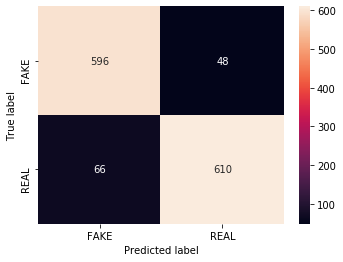


Accuracy:
0.9136363636363637


In [37]:
SVC_classifier = runModel(encoder,
               train_cv_vector,
               train_cv_label,
               train_holdout_vector,
               train_holdout.label,
               "svc",
               "Baseline Model 1: SVC")
models.loc[len(models)] = SVC

In [38]:
NB = runModel(encoder,
              train_cv_vector,
              train_cv_label,
              train_holdout_vector,
              train_holdout.label,
              "nb",
              "Baseline Model 2: Naiive Bayes")
models.loc[len(models)] = NB

Baseline Model 2: Naiive Bayes
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

CV-scores
Accuracy: 0.887 (+/-0.021) for params: {}


Best Estimator Params
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predictions:
['REAL' 'REAL' 'REAL' ... 'REAL' 'REAL' 'REAL']



Accuracy:
0.8946969696969697


Baseline Model 3: MaxEnt Classifier
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=Non

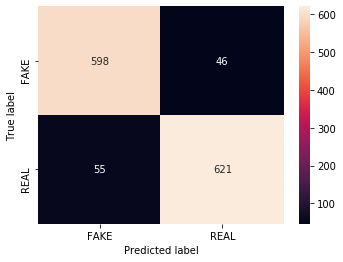


Accuracy:
0.9234848484848485


In [39]:
maxEnt = runModel(encoder,
              train_cv_vector,
              train_cv_label,
              train_holdout_vector,
              train_holdout.label,
              "maxEnt",
              "Baseline Model 3: MaxEnt Classifier")
models.loc[len(models)] = maxEnt

In [40]:
models

model_name  ...                              score
0    <class 'sklearn.svm.classes.SVC'>  ...  <class 'sklearn.svm.classes.SVC'>
1       Baseline Model 2: Naiive Bayes  ...                           0.894697
2  Baseline Model 3: MaxEnt Classifier  ...                           0.923485

[3 rows x 3 columns]

In [43]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['pos_tagged_text'] = df['preprocessed_text'].apply(lambda x: pos_tag_words(x))

In [45]:
df.head()

ID  ...                                    pos_tagged_text
0   8476  ...  NN-smell JJ-hillary NNP-’ NN-s NN-fear JJ-dani...
1  10294  ...  NN-watch JJ-exact NN-moment NN-paul JJ-ryan NN...
2   3608  ...  NN-kerry VBP-go JJ-paris NN-gesture JJ-sympath...
3  10142  ...  NN-bernie NN-supporter NN-twitter JJ-erupt NN-...
4    875  ...  NN-battle JJ-new NN-york JJ-primary NN-matter ...

[5 rows x 7 columns]

In [ ]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df, False)

count_vect = CountVectorizer(analyzer = "word")

count_vectorizer = count_vect.fit(df.preprocessed_text)

train_cv_vector = count_vectorizer.transform(train_cv.pos_tagged_text)
train_holdout_vector = count_vectorizer.transform(train_holdout.pos_tagged_text)
test_vector = count_vectorizer.transform(test.pos_tagged_text)

SVC on pos-tagged text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [10, 100, 500, 1000], 'gamma': [0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

CV-scores
Accuracy: 0.921 (+/-0.026) for params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.914 (+/-0.020) for params

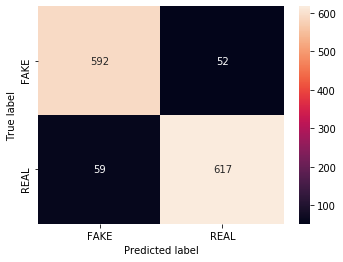


Accuracy:
0.9159090909090909


In [47]:
SVC_pos_tag = runModel(encoder,
               train_cv_vector,
               train_cv_label,
               train_holdout_vector,
               train_holdout.label,
               "svc",
               "SVC on pos-tagged text")
models.loc[len(models)] = SVC_pos_tag

Naiive Bayes on pos-tagged text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

CV-scores
Accuracy: 0.889 (+/-0.017) for params: {}


Best Estimator Params
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predictions:
['REAL' 'REAL' 'REAL' ... 'REAL' 'REAL' 'REAL']


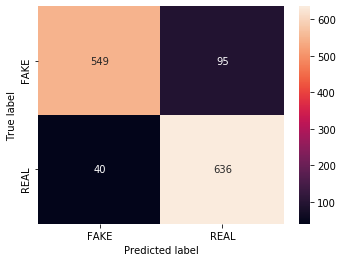


Accuracy:
0.8977272727272727


In [48]:
NB_pos_tag = runModel(encoder,
              train_cv_vector,
              train_cv_label,
              train_holdout_vector,
              train_holdout.label,
              "nb",
              "Naiive Bayes on pos-tagged text")
models.loc[len(models)] = NB_pos_tag

In [49]:
maxEnt_pos_tag = runModel(encoder,
              train_cv_vector,
              train_cv_label,
              train_holdout_vector,
              train_holdout.label,
              "maxEnt",
              "MaxEnt Classifier on pos-tagged text")
models.loc[len(models)] = maxEnt_pos_tag

MaxEnt Classifier on pos-tagged text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=No


Accuracy:
0.9295454545454546


In [50]:
models

model_name  ...                              score
0     <class 'sklearn.svm.classes.SVC'>  ...  <class 'sklearn.svm.classes.SVC'>
1        Baseline Model 2: Naiive Bayes  ...                           0.894697
2   Baseline Model 3: MaxEnt Classifier  ...                           0.923485
3                SVC on pos-tagged text  ...                           0.915909
4       Naiive Bayes on pos-tagged text  ...                           0.897727
5  MaxEnt Classifier on pos-tagged text  ...                           0.929545

[6 rows x 3 columns]

In [ ]:
df["clean_and_pos_tagged_text"] = df['preprocessed_text'] + ' ' + df['pos_tagged_text']

In [52]:
df.head(1)

ID  ...                          clean_and_pos_tagged_text
0  8476  ...  smell hillary’s fear daniel greenfield shillma...

[1 rows x 8 columns]

In [ ]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df, False)

count_vect = CountVectorizer(analyzer = "word")

count_vectorizer = count_vect.fit(df.clean_and_pos_tagged_text)

train_cv_vector = count_vectorizer.transform(train_cv.clean_and_pos_tagged_text)
train_holdout_vector = count_vectorizer.transform(train_holdout.clean_and_pos_tagged_text)
test_vector = count_vectorizer.transform(test.clean_and_pos_tagged_text)


tf_idf = TfidfTransformer(norm="l2")
train_cv_tf_idf = tf_idf.fit_transform(train_cv_vector)
train_holdout_tf_idf = tf_idf.fit_transform(train_holdout_vector)
test_tf_idf = tf_idf.fit_transform(test_vector)  

In [54]:
SVC_tf_idf = runModel(encoder,
               train_cv_tf_idf,
               train_cv_label,
               train_holdout_tf_idf,
               train_holdout.label,
               "svc",
               "SVC on preprocessed+pos-tagged TF-IDF weighted text")
models.loc[len(models)] = SVC_tf_idf

SVC on preprocessed+pos-tagged TF-IDF weighted text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [10, 100, 500, 1000], 'gamma': [0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

CV-scores
Accuracy: 0.937 (+/-0.026) for params: {'C': 50, 'kernel': 'linear'}
Accuracy: 0.937 (+/-0.0


Accuracy:
0.9454545454545454


In [55]:
NB_tf_idf = runModel(encoder,
               train_cv_tf_idf,
               train_cv_label,
               train_holdout_tf_idf,
               train_holdout.label,
              "nb",
              "Naiive Bayes on preprocessed+pos-tagged TF-IDF weighted text")
models.loc[len(models)] = NB_tf_idf

Naiive Bayes on preprocessed+pos-tagged TF-IDF weighted text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

CV-scores
Accuracy: 0.781 (+/-0.039) for params: {}


Best Estimator Params
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predictions:
['REAL' 'REAL' 'REAL' ... 'REAL' 'REAL' 'REAL']



Accuracy:
0.8166666666666667


MaxEnt on preprocessed+pos-tagged TF-IDF weighted text
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

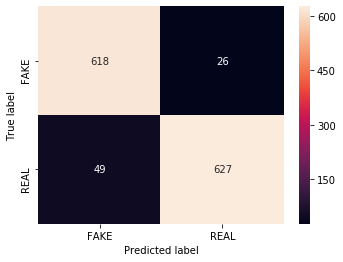


Accuracy:
0.9431818181818182


In [56]:
maxEnt_tf_idf = runModel(encoder,
               train_cv_tf_idf,
               train_cv_label,
               train_holdout_tf_idf,
               train_holdout.label,
              "maxEnt",
              "MaxEnt on preprocessed+pos-tagged TF-IDF weighted text")
models.loc[len(models)] = maxEnt_tf_idf

In [57]:
models

model_name  ...                              score
0                  <class 'sklearn.svm.classes.SVC'>  ...  <class 'sklearn.svm.classes.SVC'>
1                     Baseline Model 2: Naiive Bayes  ...                           0.894697
2                Baseline Model 3: MaxEnt Classifier  ...                           0.923485
3                             SVC on pos-tagged text  ...                           0.915909
4                    Naiive Bayes on pos-tagged text  ...                           0.897727
5               MaxEnt Classifier on pos-tagged text  ...                           0.929545
6  SVC on preprocessed+pos-tagged TF-IDF weighted...  ...                           0.945455
7  Naiive Bayes on preprocessed+pos-tagged TF-IDF...  ...                           0.816667
8  MaxEnt on preprocessed+pos-tagged TF-IDF weigh...  ...                           0.943182

[9 rows x 3 columns]

In [ ]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df, False)

trigram_vect = CountVectorizer(analyzer = "word", ngram_range=(1,2))

trigram_vect = count_vect.fit(df.clean_and_pos_tagged_text)

train_cv_vector = trigram_vect.transform(train_cv.clean_and_pos_tagged_text)
train_holdout_vector = trigram_vect.transform(train_holdout.clean_and_pos_tagged_text)
test_vector = trigram_vect.transform(test.clean_and_pos_tagged_text)

In [ ]:
tf_idf = TfidfTransformer(norm="l2")
train_cv_bigram_tf_idf = tf_idf.fit_transform(train_cv_vector)
train_holdout_bigram_tf_idf = tf_idf.fit_transform(train_holdout_vector)
test_bigram_tf_idf = tf_idf.fit_transform(test_vector)

In [60]:
SVC_trigram_tf_idf = runModel(encoder,
               train_cv_bigram_tf_idf,
               train_cv_label,
               train_holdout_bigram_tf_idf,
               train_holdout.label,
               "svc",
               "SVC on bigram vect.+ TF-IDF")
models.loc[len(models)] = SVC_trigram_tf_idf

SVC on bigram vect.+ TF-IDF
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 50, 100], 'kernel': ['linear']},
                         {'C': [10, 100, 500, 1000], 'gamma': [0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

CV-scores
Accuracy: 0.937 (+/-0.026) for params: {'C': 50, 'kernel': 'linear'}
Accuracy: 0.937 (+/-0.026) for params: {'C': 10


Accuracy:
0.9454545454545454


In [ ]:
encoder, train, test, train_cv, train_holdout, train_cv_label, train_holdout_label = split_train_holdout_test(encoder, df, False)

trigram_vect = CountVectorizer(analyzer = "word", ngram_range=(1,3))

trigram_vect = count_vect.fit(df.clean_and_pos_tagged_text)

train_cv_vector = trigram_vect.transform(train_cv.clean_and_pos_tagged_text)
train_holdout_vector = trigram_vect.transform(train_holdout.clean_and_pos_tagged_text)

In [ ]:
tf_idf = TfidfTransformer(norm="l2")
train_cv_trigram_tf_idf = tf_idf.fit_transform(train_cv_vector)
train_holdout_trigram_tf_idf = tf_idf.fit_transform(train_holdout_vector)

MaxEnt on trigram vect.+ TF-IDF
GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=12345, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

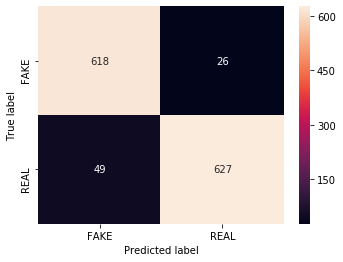


Accuracy:
0.9431818181818182


In [63]:
maxEnt_tf_idf = runModel(encoder,
               train_cv_trigram_tf_idf,
               train_cv_label,
               train_holdout_trigram_tf_idf,
               train_holdout.label,
              "maxEnt",
              "MaxEnt on trigram vect.+ TF-IDF")
models.loc[len(models)] = maxEnt_tf_idf

In [64]:
models

model_name  ...                              score
0                   <class 'sklearn.svm.classes.SVC'>  ...  <class 'sklearn.svm.classes.SVC'>
1                      Baseline Model 2: Naiive Bayes  ...                           0.894697
2                 Baseline Model 3: MaxEnt Classifier  ...                           0.923485
3                              SVC on pos-tagged text  ...                           0.915909
4                     Naiive Bayes on pos-tagged text  ...                           0.897727
5                MaxEnt Classifier on pos-tagged text  ...                           0.929545
6   SVC on preprocessed+pos-tagged TF-IDF weighted...  ...                           0.945455
7   Naiive Bayes on preprocessed+pos-tagged TF-IDF...  ...                           0.816667
8   MaxEnt on preprocessed+pos-tagged TF-IDF weigh...  ...                           0.943182
9                         SVC on bigram vect.+ TF-IDF  ...                           0.945455
10                    MaxEnt on trigram vect.+ TF-IDF  ...                           0.943182

[11 rows x 3 columns]

In [ ]:
test = pd.read_csv("fake_or_real_news_test.csv")
train = pd.read_csv("fake_or_real_news_training_CLEANED.csv")

In [ ]:
train['title_and_text'] = train['title'] +' '+ train['text']
train['preprocessed_text'] = train['title_and_text'].apply(lambda x: preprocess(x))

In [ ]:
test['title_and_text'] = test['title'] +' '+ test['text']
test['preprocessed_text'] = test['title_and_text'].apply(lambda x: preprocess(x))

In [69]:
test.head()

ID  ...                                  preprocessed_text
0  10498  ...  september new home sale rise——-back level sept...
1   2439  ...  obamacare doomsday cult can't admit wrong cong...
2    864  ...  sander cruz resist pressure ny loss vow fight ...
3   4128  ...  survive escape prisoner likely fatigue prone m...
4    662  ...  clinton sander neck neck california primary ma...

[5 rows x 5 columns]

In [ ]:
## Save preprocessed df
train.to_csv("fake_or_real_news_train_PREPROCESSED.csv", index=False)

In [ ]:
# Save preprocessed df
test.to_csv("fake_or_real_news_test_PREPROCESSED.csv", index=False)

In [ ]:
train = pd.read_csv("fake_or_real_news_train_PREPROCESSED.csv")
train = train.astype(object).replace(np.nan, 'None')

test = pd.read_csv("fake_or_real_news_test_PREPROCESSED.csv")
test = test.astype(object).replace(np.nan, 'None')

In [ ]:
test = test.astype(object).replace(np.nan, 'None')

In [75]:
test.head()

ID  ...                                  preprocessed_text
0  10498  ...  september new home sale rise——-back level sept...
1   2439  ...  obamacare doomsday cult can't admit wrong cong...
2    864  ...  sander cruz resist pressure ny loss vow fight ...
3   4128  ...  survive escape prisoner likely fatigue prone m...
4    662  ...  clinton sander neck neck california primary ma...

[5 rows x 5 columns]

In [76]:
train.head()

ID  ...                                  preprocessed_text
0   8476  ...  smell hillary’s fear daniel greenfield shillma...
1  10294  ...  watch exact moment paul ryan commit political ...
2   3608  ...  kerry go paris gesture sympathy u.s secretary ...
3  10142  ...  bernie supporter twitter erupt anger dnc try w...
4    875  ...  battle new york primary matter primary day new...

[5 rows x 8 columns]

In [ ]:
train['pos_tagged_text'] = train['preprocessed_text'].apply(lambda x: pos_tag_words(x))
test['pos_tagged_text'] = test['preprocessed_text'].apply(lambda x: pos_tag_words(x))

In [ ]:
train["clean_and_pos_tagged_text"] = train['preprocessed_text'] + ' ' + train['pos_tagged_text']
test["clean_and_pos_tagged_text"] = test['preprocessed_text'] + ' ' + train['pos_tagged_text']

In [79]:
train.head(1)

ID  ...                          clean_and_pos_tagged_text
0  8476  ...  smell hillary’s fear daniel greenfield shillma...

[1 rows x 10 columns]

In [80]:
test.head(1)

ID  ...                          clean_and_pos_tagged_text
0  10498  ...  september new home sale rise——-back level sept...

[1 rows x 7 columns]

In [ ]:
from sklearn.pipeline import Pipeline
trigram_vectorizer = CountVectorizer(analyzer = "word", ngram_range=(1,3))
tf_idf = TfidfTransformer(norm="l2")
classifier = LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

pipeline = Pipeline([
     ('trigram_vectorizer', trigram_vectorizer),
     ('tfidf', tf_idf),
     ('clf', classifier),
 ])

In [82]:
pipeline.fit(train.clean_and_pos_tagged_text, encoder.fit_transform(train.label.values))

Pipeline(memory=None,
         steps=[('trigram_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None,...
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=1000, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
   

In [ ]:
import pickle
pickle.dump( pipeline, open( "model.pkl", "wb" ) )

In [87]:
print(colored("Predicting on test", 'blue'))
test_predictions = test_predictions = pipeline.predict(test.clean_and_pos_tagged_text)

Predicting on test


In [88]:
test_predictions

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
test_predictions_decoded = encoder.inverse_transform( test_predictions )

In [ ]:
predictions = test
predictions["label"] = test_predictions_decoded

In [91]:
predictions.shape

(2321, 8)

In [92]:
predictions.head()

ID  ... label
0  10498  ...  FAKE
1   2439  ...  FAKE
2    864  ...  REAL
3   4128  ...  REAL
4    662  ...  REAL

[5 rows x 8 columns]

In [93]:
predictions.label.describe()

count     2321
unique       2
top       REAL
freq      1320
Name: label, dtype: object

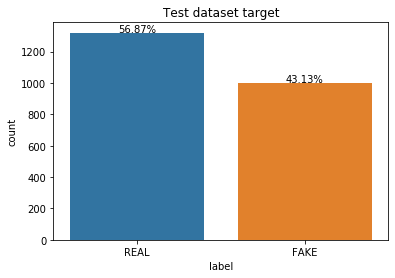

In [94]:
import collections
ax = sns.countplot(predictions.label,
                order=[x for x, count in sorted(collections.Counter(predictions.label).items(),
                key=lambda x: -x[1])])


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(predictions)*100),
            ha="center") 
ax.set_title("Test dataset target")
show()

In [95]:
predictions.drop(columns=["title","text","title_and_text","preprocessed_text","pos_tagged_text","clean_and_pos_tagged_text"]).head()

ID label
0  10498  FAKE
1   2439  FAKE
2    864  REAL
3   4128  REAL
4    662  REAL

In [ ]:
predictions.to_csv("TEST_PREDICTIONS.csv", index=False)